In [1]:
#!/usr/bin/env python3
"""
Test script to check if visual rendering works on your system
"""

import os
import sys
import time

def test_pygame():
    """Test basic pygame functionality"""
    print("🔍 Testing pygame...")
    
    try:
        import pygame
        print("✓ Pygame imported successfully")
        print(f"  Version: {pygame.version.ver}")
        
        # Initialize pygame
        pygame.init()
        print("✓ Pygame initialized")
        
        # Create a test window
        screen = pygame.display.set_mode((400, 300))
        pygame.display.set_caption("Rendering Test - Close this window")
        print("✓ Test window created")
        
        # Draw something
        screen.fill((0, 128, 255))  # Blue background
        pygame.draw.circle(screen, (255, 255, 0), (200, 150), 50)  # Yellow circle
        pygame.display.flip()
        
        print("✓ Graphics drawn - you should see a blue window with yellow circle")
        print("  The window will close automatically in 3 seconds...")
        
        # Keep window open for 3 seconds
        time.sleep(3)
        
        pygame.quit()
        print("✓ Pygame test completed successfully")
        return True
        
    except Exception as e:
        print(f"❌ Pygame test failed: {e}")
        return False

def test_minigrid_basic():
    """Test basic MiniGrid environment creation and rendering"""
    print("\n🔍 Testing MiniGrid rendering...")
    
    try:
        import gym
        import minigrid
        print("✓ MiniGrid imported")
        
        # Create a simple environment
        env = gym.make('MiniGrid-Empty-6x6-v0')
        print("✓ Environment created")
        
        # Reset and try to render
        env.reset()
        print("✓ Environment reset")
        
        # Try rendering with new API (no mode parameter)
        print("  Attempting to render...")
        try:
            env.render()  # New API
            print("✓ Render command executed - you should see a MiniGrid window")
        except Exception as e:
            print(f"❌ New API render failed: {e}")
            # Try old API as fallback
            try:
                env.render(mode='human')
                print("✓ Old API render worked - you should see a MiniGrid window")
            except Exception as e2:
                print(f"❌ Old API render also failed: {e2}")
                raise e2
        
        # Take a few random actions
        for i in range(5):
            action = env.action_space.sample()
            env.step(action)
            try:
                env.render()  # New API
            except:
                env.render(mode='human')  # Fallback
            time.sleep(0.5)
        
        print("✓ MiniGrid test completed")
        env.close()
        return True
        
    except Exception as e:
        print(f"❌ MiniGrid test failed: {e}")
        try:
            env.close()
        except:
            pass
        return False

def test_environment_variables():
    """Test and set environment variables for rendering"""
    print("\n🔍 Testing display environment...")
    
    # Check display variables
    if os.name == 'nt':  # Windows
        print("  Platform: Windows")
        os.environ['SDL_VIDEODRIVER'] = 'windib'
        print("  Set SDL_VIDEODRIVER=windib")
    else:  # Linux/Mac
        print(f"  Platform: {os.name}")
        if 'DISPLAY' in os.environ:
            print(f"  DISPLAY: {os.environ['DISPLAY']}")
        else:
            print("  DISPLAY not set - this might cause issues")
            os.environ['DISPLAY'] = ':0'
            print("  Set DISPLAY=:0")
    
    # Check if we're in a graphical environment
    try:
        import tkinter as tk
        root = tk.Tk()
        root.withdraw()  # Hide the window
        print("✓ Tkinter test passed - graphical environment available")
        root.destroy()
        return True
    except Exception as e:
        print(f"❌ Tkinter test failed: {e}")
        print("  This suggests no graphical environment is available")
        return False

def test_system_capabilities():
    """Test overall system rendering capabilities"""
    print("🔍 System Rendering Capability Test")
    print("=" * 50)
    
    # Test 1: Environment variables
    env_ok = test_environment_variables()
    
    # Test 2: Pygame
    pygame_ok = test_pygame()
    
    # Test 3: MiniGrid
    minigrid_ok = test_minigrid_basic()
    
    print("\n" + "=" * 50)
    print("📊 Test Results Summary:")
    print(f"  Environment Setup: {'✓' if env_ok else '❌'}")
    print(f"  Pygame Rendering:  {'✓' if pygame_ok else '❌'}")
    print(f"  MiniGrid Display:  {'✓' if minigrid_ok else '❌'}")
    
    if all([env_ok, pygame_ok, minigrid_ok]):
        print("\n🎉 All tests passed! Visual rendering should work.")
        print("   You can now run the visual game viewer.")
    elif pygame_ok:
        print("\n⚠️  Pygame works but MiniGrid rendering has issues.")
        print("   Try running: pip install --upgrade minigrid gymnasium")
    else:
        print("\n❌ Rendering issues detected.")
        print("   Try installing: pip install pygame")
        print("   On Linux, you might need: sudo apt-get install python3-pygame")

def install_dependencies():
    """Show installation commands for missing dependencies"""
    print("\n💡 If you see rendering issues, try these commands:")
    print("\n📦 Install/update required packages:")
    print("  pip install pygame")
    print("  pip install gymnasium[other]")
    print("  pip install --upgrade minigrid")
    
    if os.name != 'nt':  # Not Windows
        print("\n🐧 On Linux, you might also need:")
        print("  sudo apt-get install python3-pygame")
        print("  sudo apt-get install python3-tk")
        print("  export DISPLAY=:0")

if __name__ == "__main__":
    print("🧪 MiniGrid Visual Rendering Test")
    print("This will test if visual rendering works on your system")
    print()
    
    try:
        test_system_capabilities()
        install_dependencies()
        
        print("\n🚀 Next steps:")
        print("  If tests passed, run:")
        print("    python visual_game_viewer.py --env_name minigrid-crossing-stochastic")
        print("  To test rendering first:")
        print("    python visual_game_viewer.py --test_render")
        
    except KeyboardInterrupt:
        print("\n⏹ Test interrupted by user")
    except Exception as e:
        print(f"\n❌ Unexpected error: {e}")
        import traceback
        traceback.print_exc()

🧪 MiniGrid Visual Rendering Test
This will test if visual rendering works on your system

🔍 System Rendering Capability Test

🔍 Testing display environment...
  Platform: Windows
  Set SDL_VIDEODRIVER=windib
✓ Tkinter test passed - graphical environment available
🔍 Testing pygame...
pygame 2.6.1 (SDL 2.28.4, Python 3.9.0)
Hello from the pygame community. https://www.pygame.org/contribute.html
✓ Pygame imported successfully
  Version: 2.6.1
✓ Pygame initialized
✓ Test window created
✓ Graphics drawn - you should see a blue window with yellow circle
  The window will close automatically in 3 seconds...
✓ Pygame test completed successfully

🔍 Testing MiniGrid rendering...


C:\Users\Sam\Desktop\vit\.venv\lib\site-packages\gym\envs\registration.py:307: DeprecationWarning: The package name gym_minigrid has been deprecated in favor of minigrid. Please uninstall gym_minigrid and install minigrid with `pip install minigrid`. Future releases will be maintained under the new package name minigrid.
  fn()


✓ MiniGrid imported
✓ Environment created
✓ Environment reset
  Attempting to render...
✓ Render command executed - you should see a MiniGrid window


C:\Users\Sam\Desktop\vit\.venv\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


✓ MiniGrid test completed

📊 Test Results Summary:
  Environment Setup: ✓
  Pygame Rendering:  ✓
  MiniGrid Display:  ✓

🎉 All tests passed! Visual rendering should work.
   You can now run the visual game viewer.

💡 If you see rendering issues, try these commands:

📦 Install/update required packages:
  pip install pygame
  pip install gymnasium[other]
  pip install --upgrade minigrid

🚀 Next steps:
  If tests passed, run:
    python visual_game_viewer.py --env_name minigrid-crossing-stochastic
  To test rendering first:
    python visual_game_viewer.py --test_render


Image observation shape: (7, 7, 3)


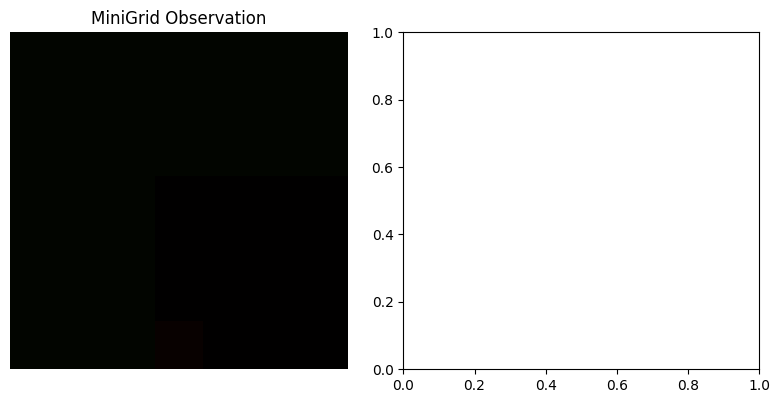

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# If observation is a dict (which is typical for MiniGrid)
if isinstance(obs, dict) and 'image' in obs:
    img_obs = obs['image']
    print(f"Image observation shape: {img_obs.shape}")
    
    # MiniGrid images are usually (height, width, channels)
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img_obs)
    plt.title("MiniGrid Observation")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    rendered = env.render()
    if rendered is not None:
        plt.imshow(rendered)
        plt.title("Environment Render")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    # If it's a direct array
    plt.imshow(obs)
    plt.title("Direct Observation")
    plt.show()

In [3]:
#!/usr/bin/env python3
"""
Model File Detective - Find and verify your trained models
"""

import os
import glob
import torch
from pathlib import Path

def search_all_model_files():
    """Search for all possible model files in the project"""
    print("🔍 Searching for all model files...")
    
    # Define search patterns
    patterns = [
        # Common patterns
        "**/*.pt",
        "**/*.pth", 
        "**/*model*.pt",
        "**/*model*.pth",
        "**/final_model*.pt",
        "**/complete_model*.pt",
        
        # Specific directories
        "./models/**/*.pt",
        "./model_free/models/**/*.pt",
        "./discrete_mbrl/models/**/*.pt",
        "./checkpoints/**/*.pt",
        "./runs/**/*.pt",
        "./experiments/**/*.pt",
    ]
    
    all_files = set()
    
    for pattern in patterns:
        try:
            files = glob.glob(pattern, recursive=True)
            all_files.update(files)
        except Exception as e:
            print(f"⚠️  Pattern {pattern} failed: {e}")
    
    if all_files:
        print(f"✓ Found {len(all_files)} model files:")
        for i, file_path in enumerate(sorted(all_files), 1):
            size_mb = os.path.getsize(file_path) / (1024 * 1024)
            mod_time = os.path.getmtime(file_path)
            import time
            mod_time_str = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(mod_time))
            print(f"  {i:2d}. {file_path}")
            print(f"      Size: {size_mb:.1f} MB, Modified: {mod_time_str}")
    else:
        print("❌ No model files found")
    
    return sorted(all_files)

def inspect_model_file(file_path):
    """Inspect the contents of a model file"""
    print(f"\n🔍 Inspecting: {file_path}")
    print("-" * 60)
    
    if not os.path.exists(file_path):
        print("❌ File does not exist!")
        return
    
    try:
        # Load the model file
        checkpoint = torch.load(file_path, map_location='cpu')
        
        print(f"✓ File loaded successfully")
        print(f"  File size: {os.path.getsize(file_path) / (1024*1024):.1f} MB")
        
        # Analyze contents
        if isinstance(checkpoint, dict):
            print(f"  Type: Dictionary with {len(checkpoint)} keys")
            print(f"  Keys: {list(checkpoint.keys())}")
            
            # Check for specific components
            components = {
                'autoencoder': ['ae_model_state_dict', 'encoder_state_dict'],
                'policy': ['policy_state_dict'],
                'critic': ['critic_state_dict'],
                'optimizer': ['optimizer_state_dict'],
                'training_info': ['step', 'epoch', 'avg_reward', 'args'],
                'model_info': ['model_info']
            }
            
            print("\n  📋 Components found:")
            for comp_name, possible_keys in components.items():
                found_keys = [key for key in possible_keys if key in checkpoint]
                if found_keys:
                    print(f"    ✓ {comp_name}: {found_keys}")
                    
                    # Show additional info for some components
                    if comp_name == 'training_info':
                        for key in found_keys:
                            if key in checkpoint:
                                value = checkpoint[key]
                                if key == 'avg_reward':
                                    print(f"      - {key}: {value:.4f}")
                                elif key == 'step':
                                    print(f"      - {key}: {value:,}")
                                elif key == 'args' and isinstance(value, dict):
                                    print(f"      - {key}: {len(value)} parameters")
                                else:
                                    print(f"      - {key}: {value}")
                else:
                    print(f"    ❌ {comp_name}: Not found")
            
            # Check model parameter counts
            print("\n  📊 Model sizes:")
            state_dict_keys = [k for k in checkpoint.keys() if 'state_dict' in k]
            for key in state_dict_keys:
                state_dict = checkpoint[key]
                if isinstance(state_dict, dict):
                    param_count = sum(p.numel() for p in state_dict.values() if hasattr(p, 'numel'))
                    print(f"    {key}: {param_count:,} parameters")
        
        else:
            print(f"  Type: {type(checkpoint)}")
            if hasattr(checkpoint, 'state_dict'):
                print(f"  Has state_dict: {len(checkpoint.state_dict())} parameters")
    
    except Exception as e:
        print(f"❌ Error loading file: {e}")
        print(f"   This might not be a valid PyTorch model file")

def check_directory_structure():
    """Check the directory structure around model files"""
    print("\n🗂️  Directory Structure Analysis:")
    print("-" * 60)
    
    # Check common model directories
    dirs_to_check = [
        "./models",
        "./model_free/models", 
        "./discrete_mbrl/models",
        "./checkpoints",
        "./runs",
        "./experiments"
    ]
    
    for dir_path in dirs_to_check:
        if os.path.exists(dir_path):
            print(f"✓ {dir_path}/")
            try:
                items = os.listdir(dir_path)
                if items:
                    for item in sorted(items)[:10]:  # Show first 10 items
                        item_path = os.path.join(dir_path, item)
                        if os.path.isdir(item_path):
                            print(f"    📁 {item}/")
                        else:
                            print(f"    📄 {item}")
                    if len(items) > 10:
                        print(f"    ... and {len(items) - 10} more items")
                else:
                    print(f"    (empty)")
            except PermissionError:
                print(f"    (permission denied)")
        else:
            print(f"❌ {dir_path}/ (does not exist)")

def suggest_fixes(all_files):
    """Suggest fixes based on what was found"""
    print("\n💡 Suggestions:")
    print("-" * 60)
    
    if not all_files:
        print("❌ No model files found at all!")
        print("\n🔧 Possible issues:")
        print("  1. Models weren't saved during training (missing --save flag)")
        print("  2. Models are in a different location")
        print("  3. Training didn't complete successfully")
        print("\n🚀 Solutions:")
        print("  1. Re-run training with: python train.py -e minigrid-crossing-stochastic -s")
        print("  2. Check if training completed without errors")
        print("  3. Look for models in your training output directory")
        return
    
    # Check for final models
    final_models = [f for f in all_files if 'final' in f.lower()]
    complete_models = [f for f in all_files if 'complete' in f.lower()]
    
    if final_models:
        print("✓ Found final models:")
        for model in final_models:
            print(f"    {model}")
        print(f"\n🎯 Use this path:")
        print(f"    python visual_game_viewer.py --model_path '{final_models[0]}'")
    elif complete_models:
        print("✓ Found complete models:")
        for model in complete_models:
            print(f"    {model}")
        print(f"\n🎯 Use this path:")
        print(f"    python visual_game_viewer.py --model_path '{complete_models[0]}'")
    else:
        print("⚠️  Found model files but no 'final' or 'complete' models")
        recent_models = sorted(all_files, key=lambda x: os.path.getmtime(x), reverse=True)
        print("📅 Most recent models:")
        for model in recent_models[:3]:
            print(f"    {model}")
        print(f"\n🎯 Try the most recent:")
        print(f"    python visual_game_viewer.py --model_path '{recent_models[0]}'")

def interactive_model_inspector():
    """Interactive model file inspector"""
    all_files = search_all_model_files()
    check_directory_structure()
    
    if all_files:
        print(f"\n🔍 Found {len(all_files)} model files. Which would you like to inspect?")
        print("   Enter number (1-{}) or 'all' to inspect all files:".format(len(all_files)))
        
        try:
            choice = input("Choice: ").strip().lower()
            
            if choice == 'all':
                for file_path in all_files:
                    inspect_model_file(file_path)
            elif choice.isdigit():
                idx = int(choice) - 1
                if 0 <= idx < len(all_files):
                    inspect_model_file(all_files[idx])
                else:
                    print("❌ Invalid choice")
            else:
                print("❌ Invalid input")
        except KeyboardInterrupt:
            print("\n⏹ Interrupted")
    
    suggest_fixes(all_files)

def main():
    """Main function"""
    print("🕵️ Model File Detective")
    print("=" * 60)
    print("This script will help you find and verify your trained models")
    print()
    
    try:
        interactive_model_inspector()
        
        print("\n" + "=" * 60)
        print("🎯 Next Steps:")
        print("  1. Use the suggested model path with --model_path")
        print("  2. If no models found, re-run training with --save flag")
        print("  3. Check that training completed successfully")
        
    except Exception as e:
        print(f"❌ Unexpected error: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

🕵️ Model File Detective
This script will help you find and verify your trained models

🔍 Searching for all model files...
✓ Found 2 model files:
   1. ./model_free/models\minigrid-crossing-stochastic\final_model_reward_0.0000.pt
      Size: 15.0 MB, Modified: 2025-06-26 04:41:08
   2. model_free\models\minigrid-crossing-stochastic\final_model_reward_0.0000.pt
      Size: 15.0 MB, Modified: 2025-06-26 04:41:08

🗂️  Directory Structure Analysis:
------------------------------------------------------------
❌ ./models/ (does not exist)
✓ ./model_free/models/
    📁 minigrid-crossing-stochastic/
❌ ./discrete_mbrl/models/ (does not exist)
❌ ./checkpoints/ (does not exist)
❌ ./runs/ (does not exist)
❌ ./experiments/ (does not exist)

🔍 Found 2 model files. Which would you like to inspect?
   Enter number (1-2) or 'all' to inspect all files:
❌ Invalid input

💡 Suggestions:
------------------------------------------------------------
✓ Found final models:
    ./model_free/models\minigrid-crossin

In [4]:
#!/usr/bin/env python3
"""
Test script to check if visual rendering works on your system
"""

import os
import sys
import time

def test_pygame():
    """Test basic pygame functionality"""
    print("🔍 Testing pygame...")
    
    try:
        import pygame
        print("✓ Pygame imported successfully")
        print(f"  Version: {pygame.version.ver}")
        
        # Initialize pygame
        pygame.init()
        print("✓ Pygame initialized")
        
        # Create a test window
        screen = pygame.display.set_mode((400, 300))
        pygame.display.set_caption("Rendering Test - Close this window")
        print("✓ Test window created")
        
        # Draw something
        screen.fill((0, 128, 255))  # Blue background
        pygame.draw.circle(screen, (255, 255, 0), (200, 150), 50)  # Yellow circle
        pygame.display.flip()
        
        print("✓ Graphics drawn - you should see a blue window with yellow circle")
        print("  The window will close automatically in 3 seconds...")
        
        # Keep window open for 3 seconds
        time.sleep(3)
        
        pygame.quit()
        print("✓ Pygame test completed successfully")
        return True
        
    except Exception as e:
        print(f"❌ Pygame test failed: {e}")
        return False

def test_minigrid_basic():
    """Test basic MiniGrid environment creation and rendering"""
    print("\n🔍 Testing MiniGrid rendering...")
    
    try:
        import gym
        import minigrid
        print("✓ MiniGrid imported")
        
        # Create a simple environment
        env = gym.make('MiniGrid-Empty-6x6-v0')
        print("✓ Environment created")
        
        # Reset and try to render
        env.reset()
        print("✓ Environment reset")
        
        # Try rendering
        print("  Attempting to render...")
        env.render(mode='human')
        print("✓ Render command executed - you should see a MiniGrid window")
        
        # Take a few random actions
        for i in range(5):
            action = env.action_space.sample()
            env.step(action)
            env.render(mode='human')
            time.sleep(0.5)
        
        print("✓ MiniGrid test completed")
        env.close()
        return True
        
    except Exception as e:
        print(f"❌ MiniGrid test failed: {e}")
        try:
            env.close()
        except:
            pass
        return False

def test_environment_variables():
    """Test and set environment variables for rendering"""
    print("\n🔍 Testing display environment...")
    
    # Check display variables
    if os.name == 'nt':  # Windows
        print("  Platform: Windows")
        os.environ['SDL_VIDEODRIVER'] = 'windib'
        print("  Set SDL_VIDEODRIVER=windib")
    else:  # Linux/Mac
        print(f"  Platform: {os.name}")
        if 'DISPLAY' in os.environ:
            print(f"  DISPLAY: {os.environ['DISPLAY']}")
        else:
            print("  DISPLAY not set - this might cause issues")
            os.environ['DISPLAY'] = ':0'
            print("  Set DISPLAY=:0")
    
    # Check if we're in a graphical environment
    try:
        import tkinter as tk
        root = tk.Tk()
        root.withdraw()  # Hide the window
        print("✓ Tkinter test passed - graphical environment available")
        root.destroy()
        return True
    except Exception as e:
        print(f"❌ Tkinter test failed: {e}")
        print("  This suggests no graphical environment is available")
        return False

def test_system_capabilities():
    """Test overall system rendering capabilities"""
    print("🔍 System Rendering Capability Test")
    print("=" * 50)
    
    # Test 1: Environment variables
    env_ok = test_environment_variables()
    
    # Test 2: Pygame
    pygame_ok = test_pygame()
    
    # Test 3: MiniGrid
    minigrid_ok = test_minigrid_basic()
    
    print("\n" + "=" * 50)
    print("📊 Test Results Summary:")
    print(f"  Environment Setup: {'✓' if env_ok else '❌'}")
    print(f"  Pygame Rendering:  {'✓' if pygame_ok else '❌'}")
    print(f"  MiniGrid Display:  {'✓' if minigrid_ok else '❌'}")
    
    if all([env_ok, pygame_ok, minigrid_ok]):
        print("\n🎉 All tests passed! Visual rendering should work.")
        print("   You can now run the visual game viewer.")
    elif pygame_ok:
        print("\n⚠️  Pygame works but MiniGrid rendering has issues.")
        print("   Try running: pip install --upgrade minigrid gymnasium")
    else:
        print("\n❌ Rendering issues detected.")
        print("   Try installing: pip install pygame")
        print("   On Linux, you might need: sudo apt-get install python3-pygame")

def install_dependencies():
    """Show installation commands for missing dependencies"""
    print("\n💡 If you see rendering issues, try these commands:")
    print("\n📦 Install/update required packages:")
    print("  pip install pygame")
    print("  pip install gymnasium[other]")
    print("  pip install --upgrade minigrid")
    
    if os.name != 'nt':  # Not Windows
        print("\n🐧 On Linux, you might also need:")
        print("  sudo apt-get install python3-pygame")
        print("  sudo apt-get install python3-tk")
        print("  export DISPLAY=:0")

if __name__ == "__main__":
    print("🧪 MiniGrid Visual Rendering Test")
    print("This will test if visual rendering works on your system")
    print()
    
    try:
        test_system_capabilities()
        install_dependencies()
        
        print("\n🚀 Next steps:")
        print("  If tests passed, run:")
        print("    python visual_game_viewer.py --env_name minigrid-crossing-stochastic")
        print("  To test rendering first:")
        print("    python visual_game_viewer.py --test_render")
        
    except KeyboardInterrupt:
        print("\n⏹ Test interrupted by user")
    except Exception as e:
        print(f"\n❌ Unexpected error: {e}")
        import traceback
        traceback.print_exc()

🧪 MiniGrid Visual Rendering Test
This will test if visual rendering works on your system

🔍 System Rendering Capability Test

🔍 Testing display environment...
  Platform: Windows
  Set SDL_VIDEODRIVER=windib
✓ Tkinter test passed - graphical environment available
🔍 Testing pygame...
✓ Pygame imported successfully
  Version: 2.6.1
✓ Pygame initialized
✓ Test window created
✓ Graphics drawn - you should see a blue window with yellow circle
  The window will close automatically in 3 seconds...
✓ Pygame test completed successfully

🔍 Testing MiniGrid rendering...
✓ MiniGrid imported
✓ Environment created
✓ Environment reset
  Attempting to render...
❌ MiniGrid test failed: render() got an unexpected keyword argument 'mode'

📊 Test Results Summary:
  Environment Setup: ✓
  Pygame Rendering:  ✓
  MiniGrid Display:  ❌

⚠️  Pygame works but MiniGrid rendering has issues.
   Try running: pip install --upgrade minigrid gymnasium

💡 If you see rendering issues, try these commands:

📦 Install/upda

In [1]:
#!/usr/bin/env python3
"""
Check PyTorch installation and CUDA availability
"""

import torch
import sys

def check_pytorch_setup():
    """Check PyTorch installation details"""
    print("=== PyTorch Setup Check ===")
    print(f"PyTorch version: {torch.__version__}")
    print(f"Python version: {sys.version}")

    # Check CUDA availability
    print(f"\nCUDA available: {torch.cuda.is_available()}")
    if torch.cuda.is_available():
        print(f"CUDA version: {torch.version.cuda}")
        print(f"Number of GPUs: {torch.cuda.device_count()}")
        for i in range(torch.cuda.device_count()):
            print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
    else:
        print("CUDA not available - using CPU")

    # Check what device would be used by default
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Default device: {device}")

    # Test basic tensor operations
    print(f"\n=== Testing tensor operations ===")
    try:
        # Test CPU
        x = torch.randn(3, 3)
        print(f"CPU tensor created: {x.shape}")

        # Test GPU if available
        if torch.cuda.is_available():
            x_gpu = x.cuda()
            print(f"GPU tensor created: {x_gpu.shape}")
            print("GPU operations working!")
        else:
            print("No GPU available for testing")

    except Exception as e:
        print(f"Error in tensor operations: {e}")

    # Recommendations
    print(f"\n=== Recommendations ===")
    if torch.cuda.is_available():
        print("✅ CUDA is available - you can use --device cuda")
    else:
        print("⚠️  CUDA not available")
        print("   Recommendation: Use --device cpu for training")
        print("   Or install CUDA-enabled PyTorch if you have a compatible GPU")
        print("   Visit: https://pytorch.org/get-started/locally/")

if __name__ == "__main__":
    check_pytorch_setup()

=== PyTorch Setup Check ===
PyTorch version: 2.6.0+cu124
Python version: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]

CUDA available: True
CUDA version: 12.4
Number of GPUs: 1
GPU 0: NVIDIA GeForce RTX 3080
Default device: cuda

=== Testing tensor operations ===
CPU tensor created: torch.Size([3, 3])
GPU tensor created: torch.Size([3, 3])
GPU operations working!

=== Recommendations ===
✅ CUDA is available - you can use --device cuda


In [3]:
#!/usr/bin/env python3
"""
GPU Utilization Diagnostic Script
Run this to identify bottlenecks in your training pipeline
"""

import os
import sys
import time
import torch
import psutil
import numpy as np
from threading import Thread
import subprocess

# Add the current directory to path
sys.path.insert(1, os.path.join(sys.path[0]))

# Import your modules
from data_helpers import prepare_dataloaders
from env_helpers import make_env
from model_construction import construct_ae_model, construct_trans_model
from training_helpers import get_args

def get_gpu_info():
    """Get current GPU utilization and memory info"""
    try:
        result = subprocess.run(['nvidia-smi', '--query-gpu=utilization.gpu,memory.used,memory.total,power.draw',
                               '--format=csv,noheader,nounits'],
                              capture_output=True, text=True)
        if result.returncode == 0:
            gpu_util, mem_used, mem_total, power = result.stdout.strip().split(', ')
            return {
                'utilization': int(gpu_util),
                'memory_used': int(mem_used),
                'memory_total': int(mem_total),
                'power': float(power),
                'memory_percent': int(mem_used) / int(mem_total) * 100
            }
    except:
        pass

    # Fallback to torch info
    return {
        'utilization': 'N/A',
        'memory_used': torch.cuda.memory_allocated() // 1024**2,
        'memory_total': torch.cuda.get_device_properties(0).total_memory // 1024**2,
        'power': 'N/A',
        'memory_percent': torch.cuda.memory_allocated() / torch.cuda.get_device_properties(0).total_memory * 100
    }

class GPUMonitor:
    def __init__(self):
        self.monitoring = False
        self.gpu_stats = []

    def start_monitoring(self):
        self.monitoring = True
        self.monitor_thread = Thread(target=self._monitor)
        self.monitor_thread.start()

    def stop_monitoring(self):
        self.monitoring = False
        if hasattr(self, 'monitor_thread'):
            self.monitor_thread.join()

    def _monitor(self):
        while self.monitoring:
            self.gpu_stats.append(get_gpu_info())
            time.sleep(0.5)

    def get_avg_utilization(self):
        if not self.gpu_stats:
            return 0
        utils = [stat['utilization'] for stat in self.gpu_stats if isinstance(stat['utilization'], int)]
        return np.mean(utils) if utils else 0

def diagnose_data_loading(args):
    """Test data loading speed"""
    print("\n" + "="*50)
    print("🔍 DIAGNOSING DATA LOADING")
    print("="*50)

    # Test with current settings
    print(f"Testing with current settings:")
    print(f"  - Batch size: {args.batch_size}")
    print(f"  - n_preload: {args.n_preload}")
    print(f"  - preload_data: {args.preload_data}")

    try:
        train_loader, _, _ = prepare_dataloaders(
            args.env_name, n=args.max_transitions, batch_size=args.batch_size,
            preprocess=args.preprocess, randomize=True, n_preload=args.n_preload,
            preload_all=args.preload_data, extra_buffer_keys=args.extra_buffer_keys
        )

        # Test data loading speed
        times = []
        print("\nTesting data loading speed...")
        for i, batch in enumerate(train_loader):
            start = time.time()
            # Simulate moving to GPU
            if torch.cuda.is_available():
                batch = [x.cuda() if hasattr(x, 'cuda') else x for x in batch]
            times.append(time.time() - start)

            if i >= 20:  # Test 20 batches
                break

        avg_time = np.mean(times)
        print(f"✓ Average time per batch: {avg_time:.4f}s")
        print(f"✓ Estimated samples/second: {args.batch_size / avg_time:.0f}")

        if avg_time > 0.1:
            print("⚠️  DATA LOADING BOTTLENECK DETECTED!")
            print("   Try: --n_preload 8 --preload_data")
        else:
            print("✓ Data loading seems fast enough")

        return avg_time

    except Exception as e:
        print(f"❌ Error testing data loading: {e}")
        return None

def diagnose_model_size(args):
    """Test if model is too small for GPU"""
    print("\n" + "="*50)
    print("🔍 DIAGNOSING MODEL SIZE")
    print("="*50)

    try:
        # Create sample environment to get observation shape
        env = make_env(args.env_name, max_steps=args.env_max_steps)
        sample_obs = env.reset()
        if isinstance(sample_obs, tuple):
            sample_obs = sample_obs[0]
        sample_obs = torch.from_numpy(sample_obs).float().unsqueeze(0)

        print(f"Sample observation shape: {sample_obs.shape}")

        # Load models
        encoder_model, _ = construct_ae_model(sample_obs.shape[1:], args, load=False)
        trans_model, _ = construct_trans_model(encoder_model, args, env.action_space, load=False)

        if torch.cuda.is_available():
            encoder_model = encoder_model.cuda()
            trans_model = trans_model.cuda()
            sample_obs = sample_obs.cuda()

        # Count parameters
        encoder_params = sum(p.numel() for p in encoder_model.parameters())
        trans_params = sum(p.numel() for p in trans_model.parameters())

        print(f"✓ Encoder parameters: {encoder_params:,}")
        print(f"✓ Transition model parameters: {trans_params:,}")
        print(f"✓ Total parameters: {encoder_params + trans_params:,}")

        # Test forward pass speed
        encoder_model.eval()
        trans_model.eval()

        with torch.no_grad():
            # Warm up
            for _ in range(5):
                encoded = encoder_model.encode(sample_obs)
                decoded = encoder_model.decode(encoded)

            # Time forward passes
            times = []
            for _ in range(50):
                start = time.time()
                encoded = encoder_model.encode(sample_obs)
                decoded = encoder_model.decode(encoded)
                times.append(time.time() - start)

        avg_forward_time = np.mean(times)
        print(f"✓ Average forward pass time: {avg_forward_time:.4f}s")

        if avg_forward_time < 0.001:
            print("⚠️  MODEL TOO SMALL FOR GPU!")
            print("   Try: --embedding_dim 128 --latent_dim 256 --trans_hidden 512")
        elif avg_forward_time < 0.01:
            print("⚠️  Model might be too small, consider increasing size")
        else:
            print("✓ Model size seems appropriate")

        env.close()
        return avg_forward_time, encoder_params + trans_params

    except Exception as e:
        print(f"❌ Error testing model: {e}")
        return None, None

def run_training_benchmark(args):
    """Run a short training benchmark with GPU monitoring"""
    print("\n" + "="*50)
    print("🔍 RUNNING TRAINING BENCHMARK")
    print("="*50)

    try:
        # Setup monitoring
        monitor = GPUMonitor()
        monitor.start_monitoring()

        # Load data
        train_loader, _, _ = prepare_dataloaders(
            args.env_name, n=min(args.max_transitions or 10000, 5000),
            batch_size=args.batch_size, preprocess=args.preprocess,
            randomize=True, n_preload=args.n_preload,
            preload_all=args.preload_data, extra_buffer_keys=args.extra_buffer_keys
        )

        # Create models
        env = make_env(args.env_name, max_steps=args.env_max_steps)
        sample_obs = env.reset()
        if isinstance(sample_obs, tuple):
            sample_obs = sample_obs[0]
        sample_obs = torch.from_numpy(sample_obs).float().unsqueeze(0)

        encoder_model, encoder_trainer = construct_ae_model(sample_obs.shape[1:], args, load=False)

        if torch.cuda.is_available():
            encoder_model = encoder_model.cuda()

        print(f"Running {min(len(train_loader), 10)} training steps...")

        # Run training steps
        training_times = []
        for i, batch in enumerate(train_loader):
            if i >= 10:  # Just test 10 batches
                break

            start = time.time()
            if encoder_trainer:
                loss, _ = encoder_trainer.train(batch)
            training_times.append(time.time() - start)

        monitor.stop_monitoring()

        avg_training_time = np.mean(training_times)
        avg_gpu_util = monitor.get_avg_utilization()

        print(f"✓ Average training time per batch: {avg_training_time:.4f}s")
        print(f"✓ Average GPU utilization: {avg_gpu_util:.1f}%")

        if avg_gpu_util < 50:
            print("⚠️  LOW GPU UTILIZATION DETECTED!")
        else:
            print("✓ GPU utilization looks good")

        env.close()
        return avg_gpu_util

    except Exception as e:
        print(f"❌ Error running benchmark: {e}")
        return None

def main():
    """Main diagnostic function"""
    print("🚀 GPU UTILIZATION DIAGNOSTIC TOOL")
    print("=" * 60)

    # Get arguments (use defaults if none provided)
    try:
        args = get_args()
    except:
        print("Using default arguments...")
        from argparse import Namespace
        args = Namespace(
            env_name='MiniGrid-Empty-5x5-v0',
            ae_model_type='ae',
            trans_model_type='continuous',
            batch_size=512,
            n_preload=0,
            preload_data=False,
            device='cuda' if torch.cuda.is_available() else 'cpu',
            max_transitions=None,
            preprocess=False,
            extra_buffer_keys=[],
            env_max_steps=None,
            embedding_dim=64,
            latent_dim=None,
            filter_size=8,
            codebook_size=16,
            trans_hidden=256,
            trans_depth=3,
            stochastic='simple',
            fta_tiles=20,
            fta_bound_low=-2,
            fta_bound_high=2,
            fta_eta=0.2,
            repr_sparsity=0,
            sparsity_type='random',
            vq_trans_loss_type='mse',
            vq_trans_1d_conv=False,
            vq_trans_state_snap=False
        )

    # System info
    print(f"🖥️  System Info:")
    print(f"   PyTorch version: {torch.__version__}")
    print(f"   CUDA available: {torch.cuda.is_available()}")
    if torch.cuda.is_available():
        print(f"   CUDA version: {torch.version.cuda}")
        print(f"   GPU: {torch.cuda.get_device_name()}")
        gpu_info = get_gpu_info()
        print(f"   GPU Memory: {gpu_info['memory_used']}MB / {gpu_info['memory_total']}MB")

    print(f"\n📝 Current Settings:")
    print(f"   Environment: {args.env_name}")
    print(f"   Batch size: {args.batch_size}")
    print(f"   Data workers: {args.n_preload}")
    print(f"   Preload data: {args.preload_data}")
    print(f"   Model type: {args.ae_model_type}")

    # Run diagnostics
    data_time = diagnose_data_loading(args)
    model_time, model_params = diagnose_model_size(args)
    gpu_util = run_training_benchmark(args)

    # Summary and recommendations
    print("\n" + "="*50)
    print("📊 SUMMARY & RECOMMENDATIONS")
    print("="*50)

    if data_time and data_time > 0.05:
        print("🔧 RECOMMENDED FIXES:")
        print("   1. Increase data loading workers: --n_preload 8")
        print("   2. Enable data preloading: --preload_data")

    if model_time and model_time < 0.01:
        print("🔧 RECOMMENDED FIXES:")
        print("   1. Increase model size: --embedding_dim 128 --latent_dim 256")
        print("   2. Larger transition model: --trans_hidden 512 --trans_depth 4")

    if args.batch_size < 512:
        print("🔧 RECOMMENDED FIXES:")
        print("   1. Increase batch size: --batch_size 1024")

    print("\n🚀 OPTIMIZED COMMAND:")
    print(f"python full_train_eval.py \\")
    print(f"    --env_name {args.env_name} \\")
    print(f"    --batch_size 1024 \\")
    print(f"    --n_preload 8 \\")
    print(f"    --preload_data \\")
    print(f"    --embedding_dim 128 \\")
    print(f"    --latent_dim 256 \\")
    print(f"    --trans_hidden 512 \\")
    print(f"    --eval_batch_size 512")

if __name__ == "__main__":
    main()

🚀 GPU UTILIZATION DIAGNOSTIC TOOL
Using default arguments...
🖥️  System Info:
   PyTorch version: 2.6.0+cu124
   CUDA available: True
   CUDA version: 12.4
   GPU: NVIDIA GeForce RTX 3080


usage: ipykernel_launcher.py [-h] [-e ENV_NAME] [-t AE_MODEL_TYPE]
                             [-v AE_MODEL_VERSION] [-tet TRANS_MODEL_TYPE]
                             [-tev TRANS_MODEL_VERSION] [-d DEVICE]
                             [-ne EPOCHS] [-tne TRANS_EPOCHS] [-b BATCH_SIZE]
                             [-l LOG_FREQ] [-c CHECKPOINT_FREQ]
                             [-lr LEARNING_RATE] [-tlr TRANS_LEARNING_RATE]
                             [-m MAX_TRANSITIONS] [-rlc RECON_LOSS_CLIP] [-u]
                             [--unique_data] [-nl] [-nc] [-p] [-w] [-cml]
                             [-i EXTRA_INFO] [-pl N_PRELOAD] [-um] [-s]
                             [-ntu N_TRAIN_UNROLL] [-pld]
                             [--env_max_steps ENV_MAX_STEPS]
                             [--rl_unroll_steps RL_UNROLL_STEPS]
                             [--rl_train_steps RL_TRAIN_STEPS] [--exact_comp]
                             [--log_state_reprs] [--tags [TAGS ...]]
                 

   GPU Memory: 1364MB / 10240MB

📝 Current Settings:
   Environment: MiniGrid-Empty-5x5-v0
   Batch size: 512
   Data workers: 0
   Preload data: False
   Model type: ae

🔍 DIAGNOSING DATA LOADING
Testing with current settings:
  - Batch size: 512
  - n_preload: 0
  - preload_data: False

Testing data loading speed...
✓ Average time per batch: 0.0192s
✓ Estimated samples/second: 26613
✓ Data loading seems fast enough

🔍 DIAGNOSING MODEL SIZE
Sample observation shape: torch.Size([1, 3, 40, 40])
❌ Error testing model: 'Namespace' object has no attribute 'wandb'

🔍 RUNNING TRAINING BENCHMARK
❌ Error running benchmark: 'Namespace' object has no attribute 'wandb'

📊 SUMMARY & RECOMMENDATIONS

🚀 OPTIMIZED COMMAND:
python full_train_eval.py \
    --env_name MiniGrid-Empty-5x5-v0 \
    --batch_size 1024 \
    --n_preload 8 \
    --preload_data \
    --embedding_dim 128 \
    --latent_dim 256 \
    --trans_hidden 512 \
    --eval_batch_size 512


🔍 COMPREHENSIVE VISUALIZATION DEBUG
This will help identify why worlds appear incomplete

DEBUGGING ENVIRONMENT OBSERVATIONS
Raw observation type: <class 'numpy.ndarray'>
Raw observation shape: (3, 48, 48)
Raw observation dtype: float64
Raw observation range: [0.000, 1.000]
Channels: 3, Height: 48, Width: 48
Channel 0 unique values: [0.         0.12941176 0.21568627 0.21960784 0.39215686 0.44313725
 0.55294118 0.88627451 1.        ]
Channel 1 unique values: [0.         0.12941176 0.21568627 0.39215686 1.        ]
Channel 2 unique values: [0.         0.12941176 0.21568627 0.39215686]


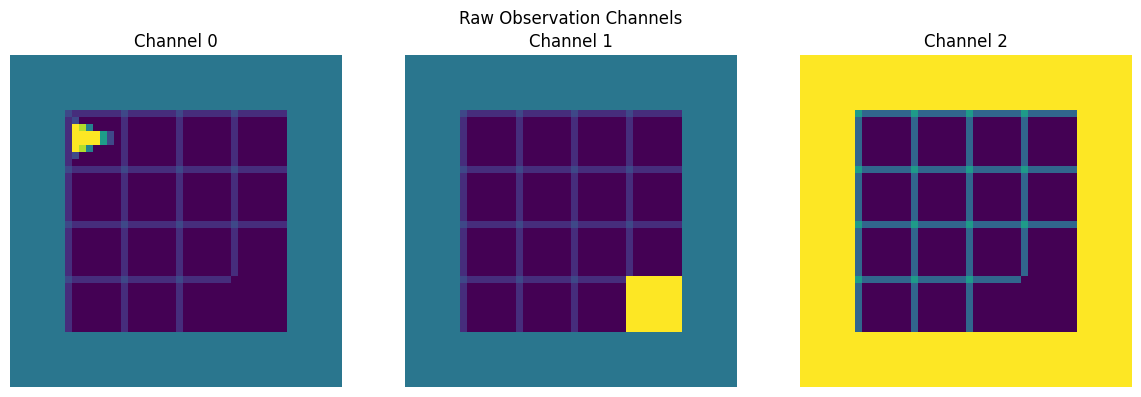

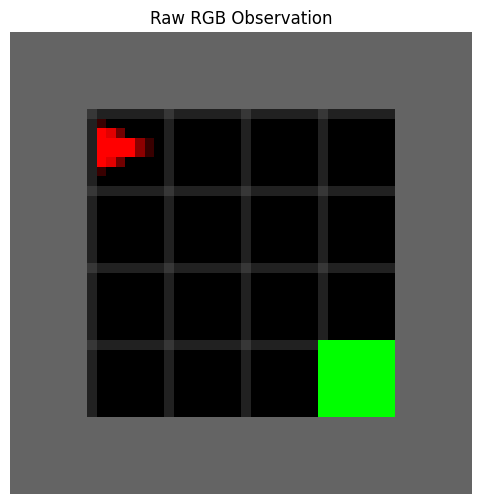


DEBUGGING STATES_TO_IMGS FUNCTION
Input tensor shape: torch.Size([3, 48, 48])
Input tensor dtype: torch.float32
Input tensor range: [0.000, 1.000]
Processing tensor shape: torch.Size([1, 3, 48, 48])
Converted output type: <class 'numpy.ndarray'>
Converted output shape: (1, 3, 48, 48)
Converted output dtype: float32
Converted output range: [0.000, 1.000]


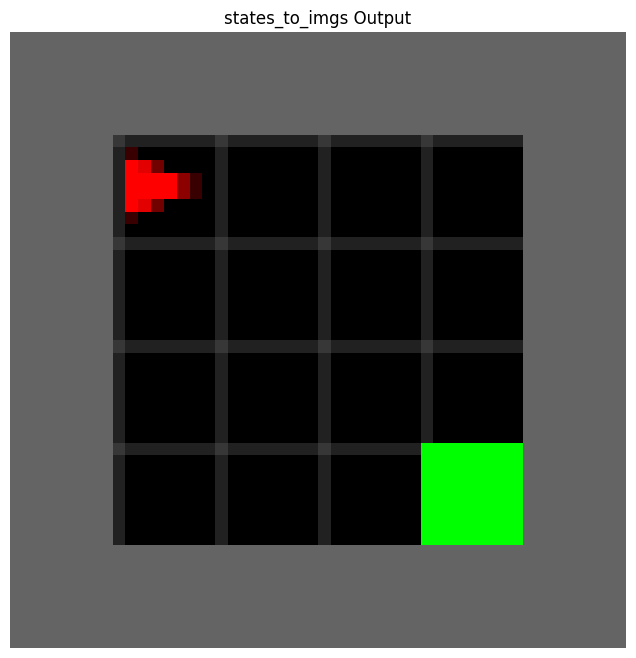


DEBUGGING MANUAL vs AUTOMATIC CONVERSION


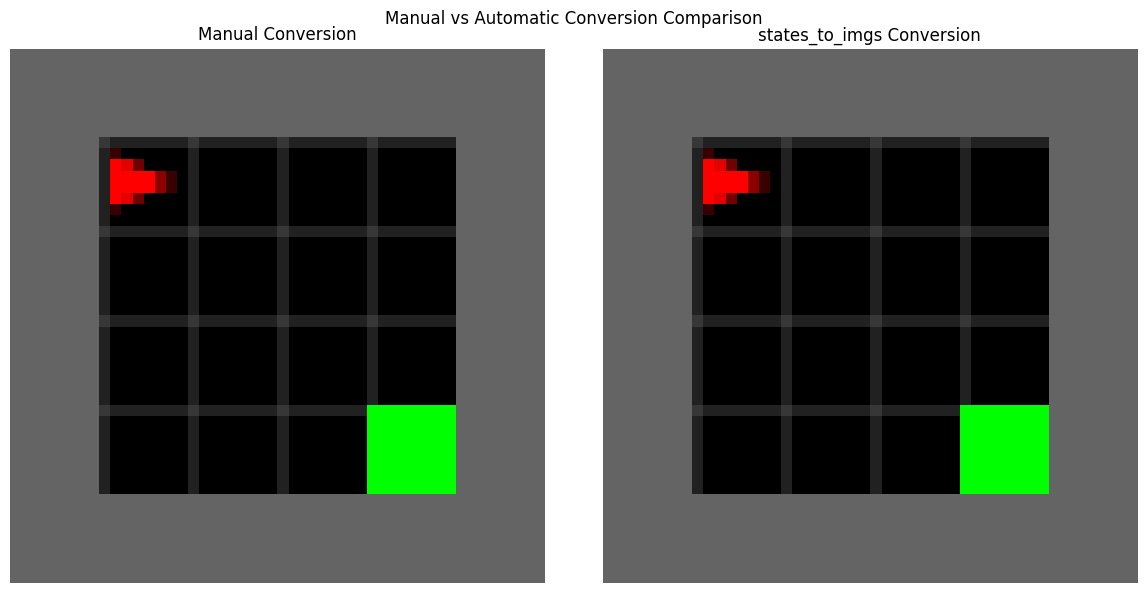

Max difference: 0.000000
Mean difference: 0.000000

DEBUGGING ENVIRONMENT WRAPPER CHAIN
Step 1: Raw MiniGrid environment
  Raw obs type: <class 'dict'>, keys: ['image', 'direction', 'mission']
  Raw image shape: (7, 7, 3)
Step 2: After RGBImgPartialObsWrapper
  RGB obs type: <class 'dict'>, keys: ['image', 'direction', 'mission']
  RGB image shape: (56, 56, 3)
  RGB image range: [76, 255]
Step 3: After ImgObsWrapper
  ImgObs type: <class 'numpy.ndarray'>, shape: (56, 56, 3)
  ImgObs range: [76, 255]
Step 4: After Custom2DWrapper
  Final obs type: <class 'numpy.ndarray'>, shape: (3, 56, 56)
  Final obs range: [0.298, 1.000]


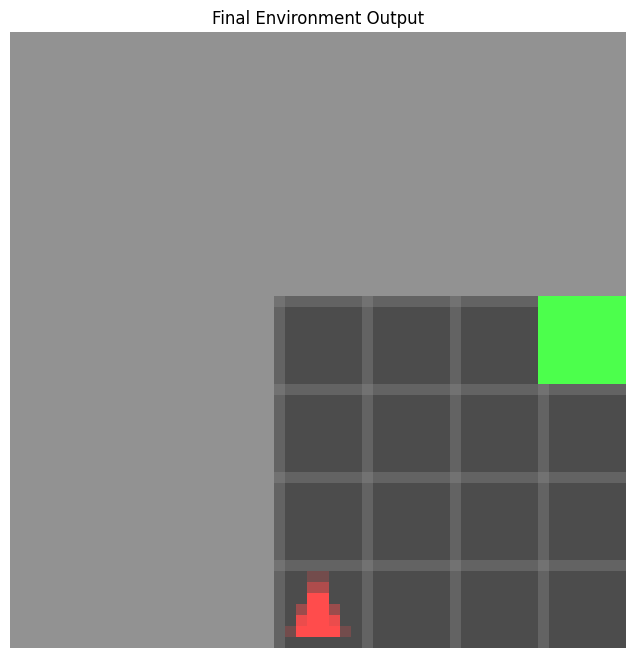


DEBUG COMPLETE!
Check the generated PNG files for visual analysis:
- debug_raw_channels.png
- debug_raw_rgb.png
- debug_states_to_imgs.png
- debug_conversion_comparison.png
- debug_final_env_output.png


In [7]:
#!/usr/bin/env python3
"""
Debug script to investigate visualization issues
"""

import os
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt

# Add the parent directory to path
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from env_helpers import make_env
from visualization import states_to_imgs


def debug_environment_observations():
    """Debug the raw environment observations"""
    print("=" * 60)
    print("DEBUGGING ENVIRONMENT OBSERVATIONS")
    print("=" * 60)

    env = make_env('MiniGrid-Empty-6x6-v0')

    # Get initial observation
    obs = env.reset()
    if isinstance(obs, tuple):
        obs = obs[0]

    print(f"Raw observation type: {type(obs)}")
    print(f"Raw observation shape: {obs.shape}")
    print(f"Raw observation dtype: {obs.dtype}")
    print(f"Raw observation range: [{obs.min():.3f}, {obs.max():.3f}]")

    # Check if observation has proper spatial dimensions
    if len(obs.shape) == 3:
        print(f"Channels: {obs.shape[0]}, Height: {obs.shape[1]}, Width: {obs.shape[2]}")

        # Visualize each channel
        fig, axes = plt.subplots(1, obs.shape[0], figsize=(12, 4))
        if obs.shape[0] == 1:
            axes = [axes]

        for i in range(obs.shape[0]):
            channel = obs[i]
            axes[i].imshow(channel, cmap='viridis')
            axes[i].set_title(f'Channel {i}')
            axes[i].axis('off')
            print(f"Channel {i} unique values: {np.unique(channel)}")

        plt.suptitle('Raw Observation Channels')
        plt.tight_layout()
        plt.savefig('debug_raw_channels.png', dpi=150, bbox_inches='tight')
        plt.show()

        # Visualize full RGB if 3 channels
        if obs.shape[0] == 3:
            rgb_img = obs.transpose(1, 2, 0)
            plt.figure(figsize=(6, 6))
            plt.imshow(rgb_img.clip(0, 1))
            plt.title('Raw RGB Observation')
            plt.axis('off')
            plt.savefig('debug_raw_rgb.png', dpi=150, bbox_inches='tight')
            plt.show()


    env.close()
    return obs


def debug_states_to_imgs_function(obs):
    """Debug the states_to_imgs conversion function"""
    print("\n" + "=" * 60)
    print("DEBUGGING STATES_TO_IMGS FUNCTION")
    print("=" * 60)

    # Convert observation to tensor format
    if isinstance(obs, np.ndarray):
        obs_tensor = torch.from_numpy(obs).float()
    else:
        obs_tensor = obs.float()

    print(f"Input tensor shape: {obs_tensor.shape}")
    print(f"Input tensor dtype: {obs_tensor.dtype}")
    print(f"Input tensor range: [{obs_tensor.min():.3f}, {obs_tensor.max():.3f}]")

    # Test states_to_imgs function
    try:
        if len(obs_tensor.shape) == 3:
            obs_tensor = obs_tensor.unsqueeze(0)  # Add batch dimension

        print(f"Processing tensor shape: {obs_tensor.shape}")

        # Call states_to_imgs
        converted_imgs = states_to_imgs(obs_tensor, env_name='MiniGrid-Empty-6x6-v0')

        print(f"Converted output type: {type(converted_imgs)}")
        print(f"Converted output shape: {converted_imgs.shape}")
        print(f"Converted output dtype: {converted_imgs.dtype}")
        print(f"Converted output range: [{converted_imgs.min():.3f}, {converted_imgs.max():.3f}]")

        # Visualize the conversion result
        if len(converted_imgs.shape) == 4:  # Batch of images
            img = converted_imgs[0]
        else:
            img = converted_imgs

        # Handle different channel arrangements
        if len(img.shape) == 3:
            if img.shape[0] <= 3:  # Channels first
                img_display = img.transpose(1, 2, 0)
            else:  # Channels last
                img_display = img
        else:
            img_display = img

        plt.figure(figsize=(8, 8))
        plt.imshow(img_display.clip(0, 1))
        plt.title('states_to_imgs Output')
        plt.axis('off')
        plt.savefig('debug_states_to_imgs.png', dpi=150, bbox_inches='tight')
        plt.show()

        return converted_imgs

    except Exception as e:
        print(f"❌ Error in states_to_imgs: {e}")
        import traceback
        traceback.print_exc()
        return None


def debug_comparison_with_manual_conversion(obs):
    """Compare automatic conversion with manual RGB handling"""
    print("\n" + "=" * 60)
    print("DEBUGGING MANUAL vs AUTOMATIC CONVERSION")
    print("=" * 60)

    # Manual conversion
    manual_img = obs.copy()
    if len(manual_img.shape) == 3 and manual_img.shape[0] <= 3:
        manual_img = manual_img.transpose(1, 2, 0)

    # Automatic conversion
    obs_tensor = torch.from_numpy(obs).float().unsqueeze(0)
    auto_img = states_to_imgs(obs_tensor, env_name='MiniGrid-Empty-6x6-v0')
    if len(auto_img.shape) == 4:
        auto_img = auto_img[0]
    if len(auto_img.shape) == 3 and auto_img.shape[0] <= 3:
        auto_img = auto_img.transpose(1, 2, 0)

    # Side by side comparison
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(manual_img.clip(0, 1))
    axes[0].set_title('Manual Conversion')
    axes[0].axis('off')

    axes[1].imshow(auto_img.clip(0, 1))
    axes[1].set_title('states_to_imgs Conversion')
    axes[1].axis('off')

    plt.suptitle('Manual vs Automatic Conversion Comparison')
    plt.tight_layout()
    plt.savefig('debug_conversion_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()

    # Check for differences
    if manual_img.shape == auto_img.shape:
        diff = np.abs(manual_img - auto_img)
        print(f"Max difference: {diff.max():.6f}")
        print(f"Mean difference: {diff.mean():.6f}")

        if diff.max() > 0.01:
            plt.figure(figsize=(8, 6))
            plt.imshow(diff, cmap='hot')
            plt.title('Difference Map (Manual - Auto)')
            plt.colorbar()
            plt.savefig('debug_difference_map.png', dpi=150, bbox_inches='tight')
            plt.show()
    else:
        print(f"Shape mismatch: Manual {manual_img.shape} vs Auto {auto_img.shape}")


def debug_environment_wrapper_chain():
    """Debug the entire environment wrapper chain"""
    print("\n" + "=" * 60)
    print("DEBUGGING ENVIRONMENT WRAPPER CHAIN")
    print("=" * 60)

    # Create environment step by step to see where the issue occurs
    import gymnasium as gym
    from minigrid.wrappers import RGBImgPartialObsWrapper, ImgObsWrapper
    from env_helpers import Custom2DWrapper

    # Step 1: Raw MiniGrid
    print("Step 1: Raw MiniGrid environment")
    env1 = gym.make('MiniGrid-Empty-6x6-v0')
    obs1 = env1.reset()
    if isinstance(obs1, tuple):
        obs1 = obs1[0]
    print(f"  Raw obs type: {type(obs1)}, keys: {list(obs1.keys()) if isinstance(obs1, dict) else 'not dict'}")
    if isinstance(obs1, dict) and 'image' in obs1:
        print(f"  Raw image shape: {obs1['image'].shape}")

    # Step 2: RGB wrapper
    print("Step 2: After RGBImgPartialObsWrapper")
    env2 = RGBImgPartialObsWrapper(env1)
    obs2 = env2.reset()
    if isinstance(obs2, tuple):
        obs2 = obs2[0]
    print(f"  RGB obs type: {type(obs2)}, keys: {list(obs2.keys()) if isinstance(obs2, dict) else 'not dict'}")
    if isinstance(obs2, dict) and 'image' in obs2:
        print(f"  RGB image shape: {obs2['image'].shape}")
        print(f"  RGB image range: [{obs2['image'].min()}, {obs2['image'].max()}]")

    # Step 3: ImgObsWrapper
    print("Step 3: After ImgObsWrapper")
    env3 = ImgObsWrapper(env2)
    obs3 = env3.reset()
    if isinstance(obs3, tuple):
        obs3 = obs3[0]
    print(f"  ImgObs type: {type(obs3)}, shape: {obs3.shape if hasattr(obs3, 'shape') else 'no shape'}")
    if hasattr(obs3, 'shape'):
        print(f"  ImgObs range: [{obs3.min()}, {obs3.max()}]")

    # Step 4: Custom2DWrapper
    print("Step 4: After Custom2DWrapper")
    env4 = Custom2DWrapper(env3)
    obs4 = env4.reset()
    if isinstance(obs4, tuple):
        obs4 = obs4[0]
    print(f"  Final obs type: {type(obs4)}, shape: {obs4.shape if hasattr(obs4, 'shape') else 'no shape'}")
    if hasattr(obs4, 'shape'):
        print(f"  Final obs range: [{obs4.min():.3f}, {obs4.max():.3f}]")

    # Visualize the final result
    if hasattr(obs4, 'shape') and len(obs4.shape) == 3:
        plt.figure(figsize=(8, 8))
        if obs4.shape[0] <= 3:
            display_img = obs4.transpose(1, 2, 0)
        else:
            display_img = obs4
        plt.imshow(display_img.clip(0, 1))
        plt.title('Final Environment Output')
        plt.axis('off')
        plt.savefig('debug_final_env_output.png', dpi=150, bbox_inches='tight')
        plt.show()

    # Clean up
    env1.close()
    env2.close()
    env3.close()
    env4.close()


def main():
    """Run all debugging functions"""
    print("🔍 COMPREHENSIVE VISUALIZATION DEBUG")
    print("This will help identify why worlds appear incomplete\n")

    # Debug 1: Raw environment observations
    obs = debug_environment_observations()

    # Debug 2: states_to_imgs function
    debug_states_to_imgs_function(obs)

    # Debug 3: Manual vs automatic conversion
    debug_comparison_with_manual_conversion(obs)

    # Debug 4: Environment wrapper chain
    debug_environment_wrapper_chain()

    print("\n" + "=" * 60)
    print("DEBUG COMPLETE!")
    print("Check the generated PNG files for visual analysis:")
    print("- debug_raw_channels.png")
    print("- debug_raw_rgb.png")
    print("- debug_states_to_imgs.png")
    print("- debug_conversion_comparison.png")
    print("- debug_final_env_output.png")
    print("=" * 60)


if __name__ == "__main__":
    main()

Found data directory: ./data
Found: ./data\MiniGrid-Empty-5x5-v0_replay_buffer.hdf5
Found: ./data\MiniGrid-Empty-6x6-v0_replay_buffer.hdf5

=== Analyzing: ./data\MiniGrid-Empty-5x5-v0_replay_buffer.hdf5 ===
File structure:
  action: (300000,), dtype: int32
  done: (300000,), dtype: bool
  next_obs: (300000, 3, 40, 40), dtype: float16
  obs: (300000, 3, 40, 40), dtype: float16
  reward: (300000,), dtype: float32

Attributes:
  data_idx: 299437

Observation shape: (300000, 3, 40, 40)
Observation dtype: float32
Observation range: [0.000, 1.000]
Number of stored transitions: 299437
Saved visualization to: MiniGrid-Empty-5x5-v0_replay_buffer_vis.png


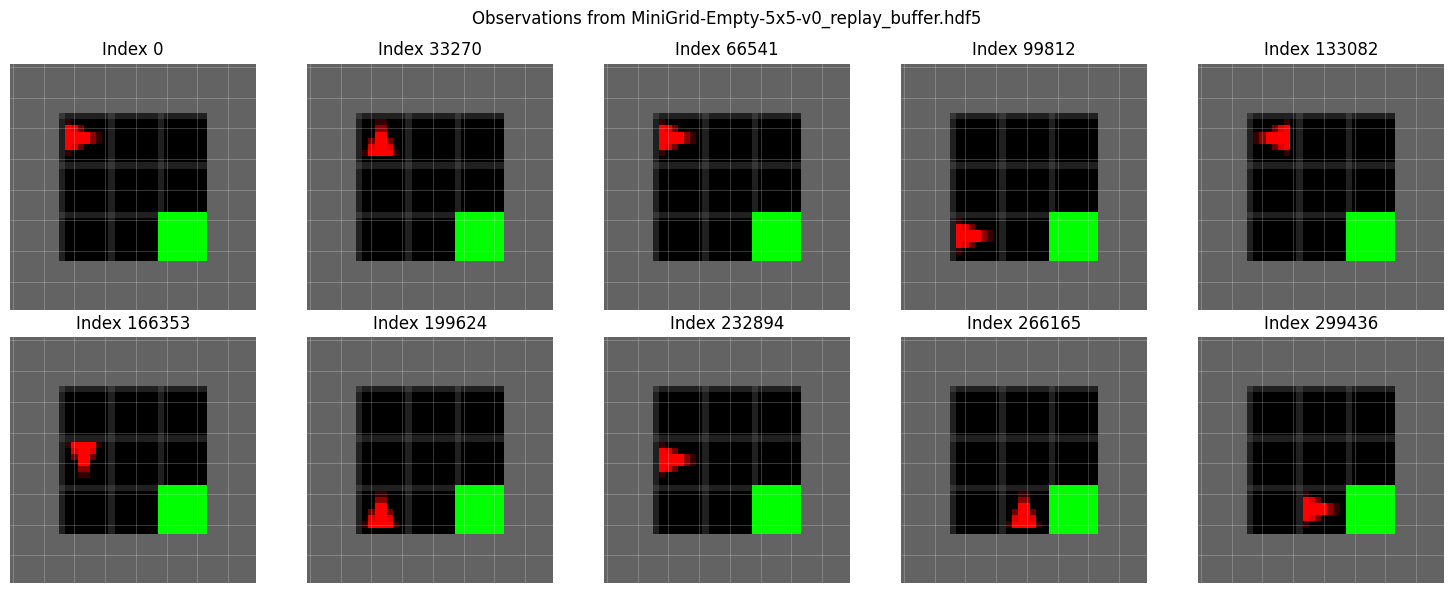


=== Position Analysis ===
Grid content analysis (based on 10 samples):
  Average grid center: (19.0, 19.0)
  Image center: (20, 20)
  Offset: (-1.0, -1.0)
  ✓ Grid appears to be CENTERED

=== Detailed view of first observation ===
Saved detailed view to: MiniGrid-Empty-5x5-v0_replay_buffer_detail.png


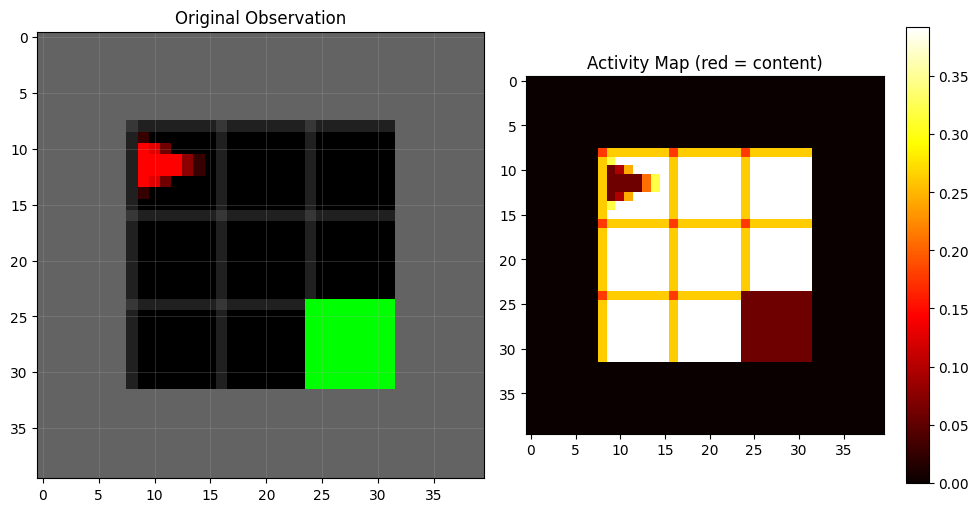


=== Analyzing: ./data\MiniGrid-Empty-6x6-v0_replay_buffer.hdf5 ===
File structure:
  action: (300000,), dtype: int32
  done: (300000,), dtype: bool
  next_obs: (300000, 3, 48, 48), dtype: float16
  obs: (300000, 3, 48, 48), dtype: float16
  reward: (300000,), dtype: float32

Attributes:
  data_idx: 297463

Observation shape: (300000, 3, 48, 48)
Observation dtype: float32
Observation range: [0.000, 1.000]
Number of stored transitions: 297463
Saved visualization to: MiniGrid-Empty-6x6-v0_replay_buffer_vis.png


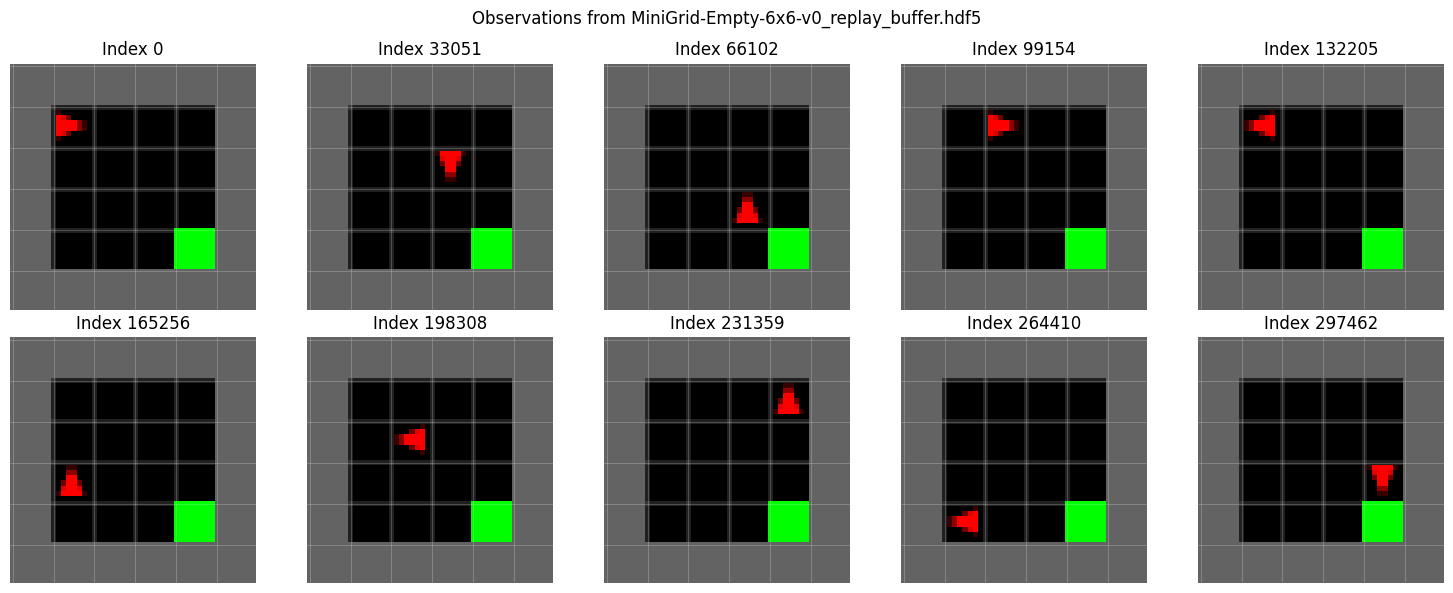


=== Position Analysis ===
Grid content analysis (based on 10 samples):
  Average grid center: (23.0, 23.0)
  Image center: (24, 24)
  Offset: (-1.0, -1.0)
  ✓ Grid appears to be CENTERED

=== Detailed view of first observation ===
Saved detailed view to: MiniGrid-Empty-6x6-v0_replay_buffer_detail.png


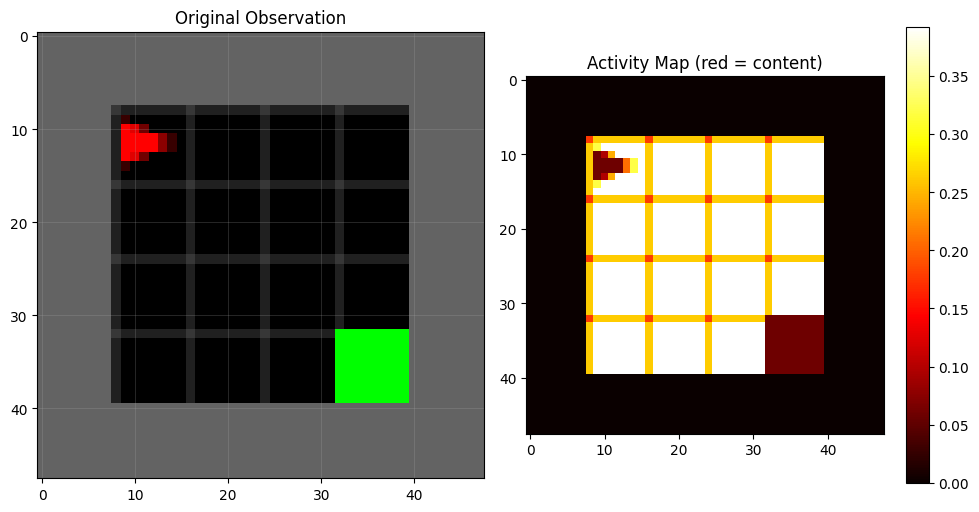


=== Summary of all replay buffer files found: ===
  ./data\MiniGrid-Empty-5x5-v0_replay_buffer.hdf5
  ./data\MiniGrid-Empty-6x6-v0_replay_buffer.hdf5


In [12]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

def visualize_replay_buffer(file_path, n_samples=10):
    """Visualize observations from a replay buffer HDF5 file."""

    print(f"\n=== Analyzing: {file_path} ===")

    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return

    with h5py.File(file_path, 'r') as f:
        # Print file structure
        print("File structure:")
        for key in f.keys():
            if hasattr(f[key], 'shape'):
                print(f"  {key}: {f[key].shape}, dtype: {f[key].dtype}")

        # Print attributes
        print("\nAttributes:")
        for attr_key in f.attrs.keys():
            print(f"  {attr_key}: {f.attrs[attr_key]}")

        # Load observations
        obs_data = f['obs'][:]

        # Convert float16 to float32 for matplotlib compatibility
        if obs_data.dtype == np.float16:
            obs_data = obs_data.astype(np.float32)

        print(f"\nObservation shape: {obs_data.shape}")
        print(f"Observation dtype: {obs_data.dtype}")
        print(f"Observation range: [{obs_data.min():.3f}, {obs_data.max():.3f}]")

        # Get the number of stored transitions
        data_idx = f.attrs.get('data_idx', len(obs_data))
        print(f"Number of stored transitions: {data_idx}")

        # Sample some observations
        if data_idx > 0:
            # Sample evenly across the dataset
            indices = np.linspace(0, min(data_idx - 1, len(obs_data) - 1),
                                n_samples, dtype=int)

            # Create visualization
            fig, axes = plt.subplots(2, 5, figsize=(15, 6))
            axes = axes.flatten()

            for i, idx in enumerate(indices):
                obs = obs_data[idx]

                # Handle different observation formats
                if len(obs.shape) == 3:
                    if obs.shape[0] <= 3:  # CHW format
                        obs_vis = obs.transpose(1, 2, 0)
                    else:  # HWC format
                        obs_vis = obs
                else:
                    obs_vis = obs

                # Normalize for visualization if needed
                if obs_vis.dtype == np.uint8:
                    obs_vis = obs_vis / 255.0

                # Ensure float32 for matplotlib
                obs_vis = obs_vis.astype(np.float32)

                axes[i].imshow(obs_vis.clip(0, 1))
                axes[i].set_title(f"Index {idx}")
                axes[i].axis('off')

                # Add grid lines to better see positioning
                h, w = obs_vis.shape[:2]
                grid_size = 8 if h > 40 else 5  # Adjust grid based on image size
                for x in range(0, w, grid_size):
                    axes[i].axvline(x, color='white', alpha=0.3, linewidth=0.5)
                for y in range(0, h, grid_size):
                    axes[i].axhline(y, color='white', alpha=0.3, linewidth=0.5)

            plt.suptitle(f"Observations from {os.path.basename(file_path)}")
            plt.tight_layout()

            # Save the figure
            save_name = os.path.basename(file_path).replace('.hdf5', '_vis.png')
            plt.savefig(save_name, dpi=150, bbox_inches='tight')
            print(f"Saved visualization to: {save_name}")
            plt.show()

            # Analyze positioning
            print("\n=== Position Analysis ===")
            # Take multiple samples to check consistency
            n_check = min(10, data_idx)
            check_indices = np.random.choice(data_idx, n_check, replace=False)

            all_centers = []
            for idx in check_indices:
                sample_obs = obs_data[idx]
                if sample_obs.shape[0] <= 3:
                    sample_obs = sample_obs.transpose(1, 2, 0)

                # Convert to grayscale for analysis
                if len(sample_obs.shape) == 3:
                    gray = np.mean(sample_obs, axis=2)
                else:
                    gray = sample_obs

                # Find non-background pixels
                # First, identify the background color (most common color)
                hist, bins = np.histogram(gray.flatten(), bins=50)
                bg_value = bins[np.argmax(hist)]

                # Find pixels significantly different from background
                non_bg_mask = np.abs(gray - bg_value) > 0.1

                if np.any(non_bg_mask):
                    rows, cols = np.where(non_bg_mask)
                    min_row, max_row = rows.min(), rows.max()
                    min_col, max_col = cols.min(), cols.max()

                    center_y = (min_row + max_row) // 2
                    center_x = (min_col + max_col) // 2
                    all_centers.append((center_y, center_x))

            if all_centers:
                # Calculate average center position
                avg_center_y = np.mean([c[0] for c in all_centers])
                avg_center_x = np.mean([c[1] for c in all_centers])

                img_center_y = gray.shape[0] // 2
                img_center_x = gray.shape[1] // 2

                print(f"Grid content analysis (based on {len(all_centers)} samples):")
                print(f"  Average grid center: ({avg_center_y:.1f}, {avg_center_x:.1f})")
                print(f"  Image center: ({img_center_y}, {img_center_x})")
                print(f"  Offset: ({avg_center_y - img_center_y:.1f}, {avg_center_x - img_center_x:.1f})")

                # Determine positioning
                offset_y = abs(avg_center_y - img_center_y)
                offset_x = abs(avg_center_x - img_center_x)

                if offset_y < 3 and offset_x < 3:
                    print("  ✓ Grid appears to be CENTERED")
                else:
                    print(f"  ✗ Grid is OFF-CENTER")
                    if avg_center_y > img_center_y + 5:
                        print("    Grid is in the BOTTOM half")
                    elif avg_center_y < img_center_y - 5:
                        print("    Grid is in the TOP half")
                    if avg_center_x > img_center_x + 5:
                        print("    Grid is in the RIGHT half")
                    elif avg_center_x < img_center_x - 5:
                        print("    Grid is in the LEFT half")

            # Show a detailed view of one observation
            print("\n=== Detailed view of first observation ===")
            detail_obs = obs_data[0]
            if detail_obs.shape[0] <= 3:
                detail_obs = detail_obs.transpose(1, 2, 0)

            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

            # Original observation
            ax1.imshow(detail_obs.astype(np.float32).clip(0, 1))
            ax1.set_title("Original Observation")
            ax1.grid(True, alpha=0.3, linewidth=0.5)

            # Heatmap showing non-background regions
            gray_detail = np.mean(detail_obs, axis=2) if len(detail_obs.shape) == 3 else detail_obs
            bg_value = np.median(gray_detail)
            diff_map = np.abs(gray_detail - bg_value)

            im = ax2.imshow(diff_map, cmap='hot')
            ax2.set_title("Activity Map (red = content)")
            plt.colorbar(im, ax=ax2)

            plt.tight_layout()
            detail_save_name = os.path.basename(file_path).replace('.hdf5', '_detail.png')
            plt.savefig(detail_save_name, dpi=150, bbox_inches='tight')
            print(f"Saved detailed view to: {detail_save_name}")
            plt.show()

def main():
    # Define the data directory - try different possible locations
    possible_dirs = [

        './data'

    ]

    data_dir = None
    for dir_path in possible_dirs:
        if os.path.exists(dir_path):
            data_dir = dir_path
            print(f"Found data directory: {data_dir}")
            break

    if data_dir is None:
        print("Could not find data directory!")
        return

    # List of files to check
    files = [
        'MiniGrid-Empty-5x5-v0_replay_buffer.hdf5',
        'MiniGrid-Empty-6x6-v0_replay_buffer.hdf5'
    ]

    # Look for files in the directory
    found_files = []
    for root, dirs, filenames in os.walk(data_dir):
        for filename in filenames:
            if 'replay_buffer' in filename and filename.endswith('.hdf5'):
                full_path = os.path.join(root, filename)
                found_files.append(full_path)
                print(f"Found: {full_path}")

    # Process each file
    for file_path in found_files:
        if any(target in file_path for target in ['5x5', '6x6']):
            visualize_replay_buffer(file_path)

    print("\n=== Summary of all replay buffer files found: ===")
    for file_path in found_files:
        print(f"  {file_path}")

if __name__ == "__main__":
    main()


Model Prediction Diagnostic Tool

=== TESTING FIXES ===
=== MODEL DIAGNOSIS ===
Input observation:
  Shape: (3, 48, 48)
  Range: [0.000, 1.000]
  Mean: 0.242
AE mid filter shape: torch.Size([6, 6])
Constructed AE with 64-dim latent space
No model found at "./models/MiniGrid-Empty-6x6-v0/model_76d8ae8aa67ef425ed6e22f038734d9e.pt", not loading
No model found at "./models/MiniGrid-Empty-6x6-v0/model_f0768af362d67b4547bae8ad195d00c0.pt", not loading
✓ Models loaded successfully

=== ENCODER-DECODER TEST ===
Input tensor:
  Shape: torch.Size([1, 3, 48, 48])
  Range: [0.000, 1.000]
Encoded latent:
  Shape: torch.Size([1, 64])
  Range: [-0.039, 0.045]
  Mean: -0.001
  Std: 0.017
Decoded output:
  Shape: torch.Size([1, 3, 48, 48])
  Range: [0.000, 0.089]
  Mean: 0.034
  Std: 0.030

=== TRANSITION MODEL TEST ===
Transition output:
  Next latent shape: torch.Size([1, 64])
  Next latent range: [-0.107, 0.085]
  Reward pred: -0.039
Next decoded state:
  Shape: torch.Size([1, 3, 48, 48])
  Range: [

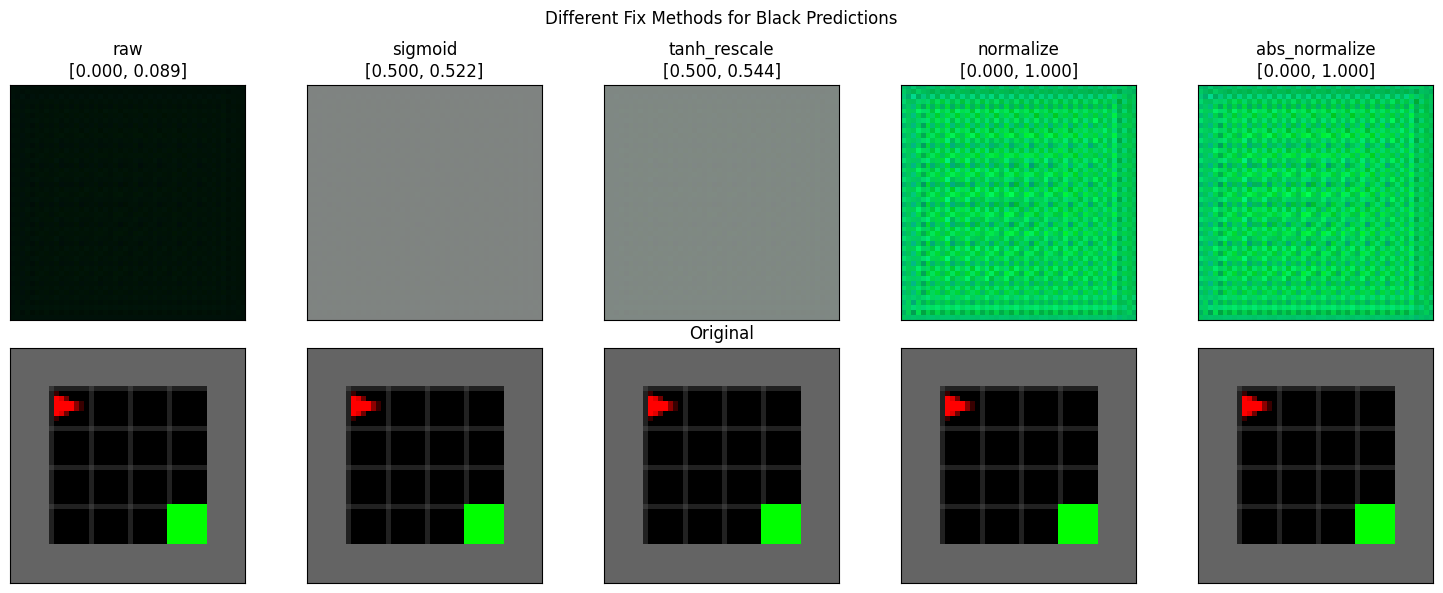

sigmoid        : score 34.92 (lower is better)
tanh_rescale   : score -15.17 (lower is better)
normalize      : score -13.83 (lower is better)
abs_normalize  : score -13.83 (lower is better)

🎯 Recommended fix method: tanh_rescale

DIAGNOSIS COMPLETE

Likely causes of black predictions:
1. Decoder outputs are in wrong range (e.g., negative values)
2. Model weights are not properly loaded (random initialization)
3. Decoder is saturated/clipped

Try the recommended fix method in your visualization script!


In [15]:
#!/usr/bin/env python3
"""
Diagnostic script to fix the black prediction issue
"""

import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import numpy as np
import torch
import matplotlib.pyplot as plt
import glob

# Import your modules
from env_helpers import make_env
from model_construction import construct_ae_model, construct_trans_model



def diagnose_models():
    """Diagnose what's wrong with the model predictions"""
    print("=== MODEL DIAGNOSIS ===")

    # Load the working configuration from previous successful run
    config = {'ae_model_type': 'ae', 'trans_model_type': 'continuous', 'latent_dim': 64, 'embedding_dim': 64}
    args = create_args_from_config(config)

    # Create environment
    env = make_env('MiniGrid-Empty-6x6-v0')
    obs = env.reset()
    if isinstance(obs, tuple):
        obs = obs[0]
    obs_shape = obs.shape

    print(f"Input observation:")
    print(f"  Shape: {obs.shape}")
    print(f"  Range: [{obs.min():.3f}, {obs.max():.3f}]")
    print(f"  Mean: {obs.mean():.3f}")

    # Load models
    try:
        encoder_result = construct_ae_model(obs_shape, args, load=True)
        encoder_model = encoder_result[0] if isinstance(encoder_result, tuple) else encoder_result
        encoder_model = encoder_model.to(args.device)
        encoder_model.eval()

        trans_result = construct_trans_model(encoder_model, args, env.action_space, load=True)
        trans_model = trans_result[0] if isinstance(trans_result, tuple) else trans_result
        trans_model = trans_model.to(args.device)
        trans_model.eval()

        print("✓ Models loaded successfully")

    except Exception as e:
        print(f"✗ Model loading failed: {e}")
        return None, None, None, None

    # Test encoder-decoder pipeline
    print(f"\n=== ENCODER-DECODER TEST ===")

    obs_tensor = torch.from_numpy(obs).float().unsqueeze(0).to(args.device)
    print(f"Input tensor:")
    print(f"  Shape: {obs_tensor.shape}")
    print(f"  Range: [{obs_tensor.min():.3f}, {obs_tensor.max():.3f}]")

    # Test encoding
    with torch.no_grad():
        latent = encoder_model.encode(obs_tensor)
        print(f"Encoded latent:")
        print(f"  Shape: {latent.shape}")
        print(f"  Range: [{latent.min():.3f}, {latent.max():.3f}]")
        print(f"  Mean: {latent.mean():.3f}")
        print(f"  Std: {latent.std():.3f}")

        # Test decoding
        decoded = encoder_model.decode(latent)
        print(f"Decoded output:")
        print(f"  Shape: {decoded.shape}")
        print(f"  Range: [{decoded.min():.3f}, {decoded.max():.3f}]")
        print(f"  Mean: {decoded.mean():.3f}")
        print(f"  Std: {decoded.std():.3f}")

        # Check if output is all zeros/near zeros
        if decoded.max() < 0.01:
            print("  ⚠️  WARNING: Decoded output is near zero!")

        if decoded.min() < -0.01:
            print("  ⚠️  WARNING: Decoded output has negative values!")

    # Test transition model
    print(f"\n=== TRANSITION MODEL TEST ===")

    action = torch.tensor([1]).to(args.device)  # Test action
    with torch.no_grad():
        trans_output = trans_model(latent, action)
        if len(trans_output) >= 3:
            latent_next, reward_pred, gamma_pred = trans_output[:3]
        else:
            latent_next = trans_output[0]
            reward_pred = torch.tensor([0.0])
            gamma_pred = torch.tensor([1.0])

        print(f"Transition output:")
        print(f"  Next latent shape: {latent_next.shape}")
        print(f"  Next latent range: [{latent_next.min():.3f}, {latent_next.max():.3f}]")
        print(f"  Reward pred: {reward_pred.item():.3f}")

        # Decode next state
        decoded_next = encoder_model.decode(latent_next)
        print(f"Next decoded state:")
        print(f"  Shape: {decoded_next.shape}")
        print(f"  Range: [{decoded_next.min():.3f}, {decoded_next.max():.3f}]")
        print(f"  Mean: {decoded_next.mean():.3f}")

        # Check if transition output is all zeros
        if decoded_next.max() < 0.01:
            print("  ⚠️  WARNING: Transition decoded output is near zero!")

    return encoder_model, trans_model, env, args


def create_args_from_config(config):
    """Create args from config (same as before)"""
    class ModelArgs:
        def __init__(self):
            # Default values
            self.ae_model_type = 'ae'
            self.ae_model_version = '2'
            self.trans_model_type = 'continuous'
            self.trans_model_version = '1'
            self.embedding_dim = 64
            self.latent_dim = 256
            self.filter_size = 8
            self.codebook_size = 16
            self.trans_hidden = 256
            self.trans_depth = 3
            self.stochastic = 'simple'
            self.env_name = 'MiniGrid-Empty-6x6-v0'
            self.env_max_steps = None
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
            self.load = True

            # Required attributes
            self.wandb = False
            self.comet_ml = False
            self.tags = None
            self.epochs = 0
            self.batch_size = 512
            self.learning_rate = 0.0002
            self.trans_learning_rate = 0.0002
            self.log_freq = 500
            self.checkpoint_freq = 10
            self.save = False
            self.upload_model = False
            self.max_transitions = None
            self.preprocess = False
            self.unique_data = False
            self.cache = True
            self.n_preload = 0
            self.preload_data = False
            self.n_train_unroll = 4
            self.exact_comp = False
            self.log_state_reprs = False
            self.eval_batch_size = 128
            self.eval_unroll_steps = 20
            self.eval_policies = ['random']
            self.extra_info = None
            self.repr_sparsity = 0
            self.sparsity_type = 'random'
            self.vq_trans_1d_conv = False
            self.vq_trans_state_snap = False
            self.vq_trans_loss_type = 'mse'
            self.e2e_loss = False
            self.log_norms = False
            self.ae_grad_clip = 0
            self.recon_loss_clip = 0
            self.extra_buffer_keys = []
            self.fta_tiles = 20
            self.fta_bound_low = -2
            self.fta_bound_high = 2
            self.fta_eta = 0.2
            self.ae_model_hash = None
            self.trans_model_hash = None
            self.rl_train_steps = 0
            self.rl_unroll_steps = -1
            self.obs_resize = None
            self.obs_resize_mode = 'bilinear'
            self.no_obs_resize = False

    args = ModelArgs()
    for key, value in config.items():
        setattr(args, key, value)
    return args


def fix_decoder_output(decoder_output, method='sigmoid'):
    """Apply different fixes to decoder output"""
    if method == 'sigmoid':
        return torch.sigmoid(decoder_output)
    elif method == 'tanh_rescale':
        return (torch.tanh(decoder_output) + 1) / 2
    elif method == 'clip':
        return torch.clamp(decoder_output, 0, 1)
    elif method == 'normalize':
        min_val = decoder_output.min()
        max_val = decoder_output.max()
        if max_val > min_val:
            return (decoder_output - min_val) / (max_val - min_val)
        else:
            return decoder_output
    elif method == 'abs_normalize':
        abs_output = torch.abs(decoder_output)
        max_val = abs_output.max()
        if max_val > 0:
            return abs_output / max_val
        else:
            return abs_output
    else:
        return decoder_output


def test_fixes():
    """Test different fixes for the black output issue"""
    print("\n=== TESTING FIXES ===")

    encoder_model, trans_model, env, args = diagnose_models()

    if encoder_model is None:
        print("Cannot test fixes - model loading failed")
        return

    # Get test observation
    obs = env.reset()
    if isinstance(obs, tuple):
        obs = obs[0]

    obs_tensor = torch.from_numpy(obs).float().unsqueeze(0).to(args.device)

    # Test different fix methods
    fix_methods = ['sigmoid', 'tanh_rescale', 'clip', 'normalize', 'abs_normalize']

    with torch.no_grad():
        latent = encoder_model.encode(obs_tensor)

        # Test simple reconstruction first
        print("\n--- Testing Encoder-Decoder Reconstruction ---")
        raw_decoded = encoder_model.decode(latent)

        for method in fix_methods:
            fixed_decoded = fix_decoder_output(raw_decoded, method)
            print(f"{method:15}: range [{fixed_decoded.min():.3f}, {fixed_decoded.max():.3f}], mean {fixed_decoded.mean():.3f}")

        # Test transition model
        print("\n--- Testing Transition Model Predictions ---")
        action = torch.tensor([1]).to(args.device)
        trans_output = trans_model(latent, action)
        latent_next = trans_output[0]
        raw_next_decoded = encoder_model.decode(latent_next)

        for method in fix_methods:
            fixed_next_decoded = fix_decoder_output(raw_next_decoded, method)
            print(f"{method:15}: range [{fixed_next_decoded.min():.3f}, {fixed_next_decoded.max():.3f}], mean {fixed_next_decoded.mean():.3f}")

    # Create visualization with fixes
    create_fix_visualization(encoder_model, trans_model, env, args)


def create_fix_visualization(encoder_model, trans_model, env, args):
    """Create visualization showing different fix methods"""
    print("\n=== CREATING FIX VISUALIZATION ===")

    obs = env.reset()
    if isinstance(obs, tuple):
        obs = obs[0]

    obs_tensor = torch.from_numpy(obs).float().unsqueeze(0).to(args.device)

    with torch.no_grad():
        # Original observation
        latent = encoder_model.encode(obs_tensor)

        # Step forward
        action = torch.tensor([1]).to(args.device)
        trans_output = trans_model(latent, action)
        latent_next = trans_output[0]
        raw_decoded = encoder_model.decode(latent_next)

        # Apply different fixes
        fix_methods = ['raw', 'sigmoid', 'tanh_rescale', 'normalize', 'abs_normalize']

        fig, axes = plt.subplots(2, len(fix_methods), figsize=(15, 6))

        for i, method in enumerate(fix_methods):
            if method == 'raw':
                fixed = raw_decoded
            else:
                fixed = fix_decoder_output(raw_decoded, method)

            # Convert to numpy for display
            img = fixed[0].cpu().numpy()
            if img.shape[0] <= 3:  # CHW format
                img = img.transpose(1, 2, 0)
            img = np.clip(img, 0, 1)

            # Top row: the fixed images
            axes[0, i].imshow(img)
            axes[0, i].set_title(f'{method}\n[{fixed.min():.3f}, {fixed.max():.3f}]')
            axes[0, i].set_xticks([])
            axes[0, i].set_yticks([])

            # Bottom row: original observation for comparison
            orig_img = obs.transpose(1, 2, 0) if obs.shape[0] <= 3 else obs
            axes[1, i].imshow(orig_img)
            axes[1, i].set_title('Original' if i == len(fix_methods)//2 else '')
            axes[1, i].set_xticks([])
            axes[1, i].set_yticks([])

        plt.suptitle('Different Fix Methods for Black Predictions')
        plt.tight_layout()
        plt.savefig('fix_comparison.png', dpi=150, bbox_inches='tight')
        plt.show()

        # Find best fix
        best_method = find_best_fix_method(raw_decoded, obs_tensor)
        print(f"\n🎯 Recommended fix method: {best_method}")

        return best_method


def find_best_fix_method(raw_decoded, original_obs):
    """Find the best fix method by comparing to original"""
    fix_methods = ['sigmoid', 'tanh_rescale', 'normalize', 'abs_normalize']
    best_method = 'sigmoid'
    best_score = float('inf')

    for method in fix_methods:
        fixed = fix_decoder_output(raw_decoded, method)

        # Score based on: 1) non-zero output, 2) reasonable range, 3) variation
        score = 0

        # Penalize if output is too close to zero
        if fixed.max() < 0.1:
            score += 100

        # Penalize if no variation
        if fixed.std() < 0.01:
            score += 50

        # Reward if in reasonable range [0, 1]
        if fixed.min() >= 0 and fixed.max() <= 1:
            score -= 10

        # Reward higher mean (more visible)
        score -= fixed.mean() * 10

        print(f"{method:15}: score {score:.2f} (lower is better)")

        if score < best_score:
            best_score = score
            best_method = method

    return best_method


def main():
    print("Model Prediction Diagnostic Tool")
    print("="*40)

    # Run diagnosis and fixes
    test_fixes()

    print("\n" + "="*40)
    print("DIAGNOSIS COMPLETE")
    print("\nLikely causes of black predictions:")
    print("1. Decoder outputs are in wrong range (e.g., negative values)")
    print("2. Model weights are not properly loaded (random initialization)")
    print("3. Decoder is saturated/clipped")
    print("\nTry the recommended fix method in your visualization script!")


if __name__ == "__main__":
    main()